In [1]:
#!pip install kagglehub

# Problem Statement

##### This project aims to analyze how social media screen time, sleep quality, and exercise frequency influence the overall Happiness Index of individuals across different demographic groups. By examining behavioral patterns and identifying imbalances between digital engagement and personal well-being, the study seeks to uncover factors associated with healthier or unhealthier mental health outcomes. The insights generated from this analysis can help educators, wellness programs, and digital well-being advocates design more effective guidelines for balanced social media use.

## **Short Description:** 
Data driven analysis of how social media usage relates to sleep quality, stress, exercise, and overall happiness. Includes 
exploratory data analysis, feature engineering, predictive models (regression for Happiness Index; classification for 
high stress risk), model explainability, and an interactive demo.

## *The goal is to create clear, intuitive, and insight-driven visuals that help answer the following questions:*

1. How does daily social media screen time correlate with the Happiness Index across users?
2. Is poor sleep quality associated with lower happiness scores, and does screen exposure intensify this effect?
3. Does exercise frequency protect happiness levels even among high screen-time users?
4. How do screen time, sleep quality, and exercise interact to shape overall well-being?
5. Which demographic groups (age, gender) show the greatest imbalance between screen time and well-being?
6. Can we identify high-risk or balanced lifestyle patterns based on behavior clusters (e.g., high screen time + low sleep + low exercise)?

## Importing necessary libraries 

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing and Reading the Dataset

In [3]:
import kagglehub

path = r"C:\Users\Khushboo Jain\.cache\kagglehub\datasets\ayeshaimran123\social-media-and-mental-health-balance\versions\1\Mental_Health_and_Social_Media_Balance_Dataset.xlsx"
print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\Khushboo Jain\.cache\kagglehub\datasets\ayeshaimran123\social-media-and-mental-health-balance\versions\1\Mental_Health_and_Social_Media_Balance_Dataset.xlsx


In [4]:
folder_path = r"C:\Users\Khushboo Jain\.cache\kagglehub\datasets\ayeshaimran123\social-media-and-mental-health-balance\versions\1"
print(os.listdir(folder_path))

['Mental_Health_and_Social_Media_Balance_Dataset.xlsx', '~$Mental_Health_and_Social_Media_Balance_Dataset.xlsx']


In [5]:
file_path = r"C:\Users\Khushboo Jain\.cache\kagglehub\datasets\ayeshaimran123\social-media-and-mental-health-balance\versions\1\Mental_Health_and_Social_Media_Balance_Dataset.xlsx"

df = pd.read_excel(file_path)
print(df.head())  

  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                    7   
1    U002   30   Other                     5.1                    7   
2    U003   23   Other                     7.4                    6   
3    U004   36  Female                     5.7                    7   
4    U005   34  Female                     7.0                    4   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                   6                          2                         5   
1                   8                          5                         3   
2                   7                          1                         3   
3                   8                          1                         1   
4                   7                          5                         1   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook                     10  
1     

In [6]:
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10
2,U003,23,Other,7.4,6,7,1,3,YouTube,6
3,U004,36,Female,5.7,7,8,1,1,TikTok,8
4,U005,34,Female,7.0,4,7,5,1,X (Twitter),8
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5,7,4,2,X (Twitter),10
496,U497,43,Female,5.6,7,6,5,2,Facebook,9
497,U498,41,Male,7.7,5,7,2,2,LinkedIn,8
498,U499,23,Male,4.2,9,7,0,2,Facebook,9


#### Reading the shape of the dataset

In [7]:
print(f"Shape:{df.shape}")
print("Columns:", df.columns.tolist())

Shape:(500, 10)
Columns: ['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']


## Exploratory Data Analysis

### Step 1: Information about the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    int64  
 5   Stress_Level(1-10)         500 non-null    int64  
 6   Days_Without_Social_Media  500 non-null    int64  
 7   Exercise_Frequency(week)   500 non-null    int64  
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


##### Insights: 

The features are majorly in continous numerical values except for the features `Age, Gender and Social Media Platform` which has categorical values and object data type

### Step 2: Checking the null values

In [9]:
df.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

##### Insights: 

There are no null values in the dataset 

### Step 3: Check for the duplicate values

In [10]:
df.duplicated().sum()

0

##### Insights:
There are no duplicate values in the dataset

### Step 4: Checking for outlier detection

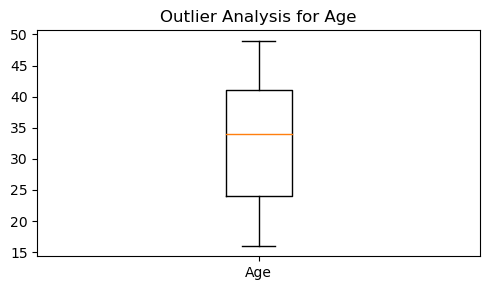

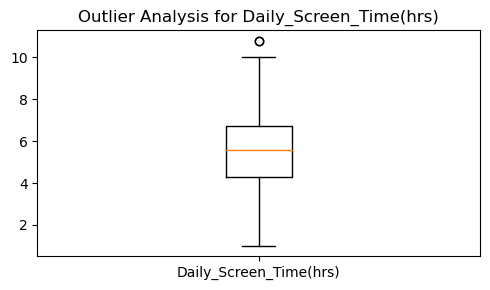

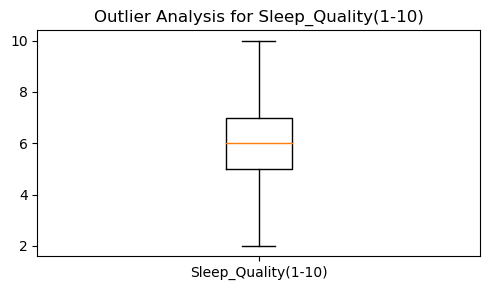

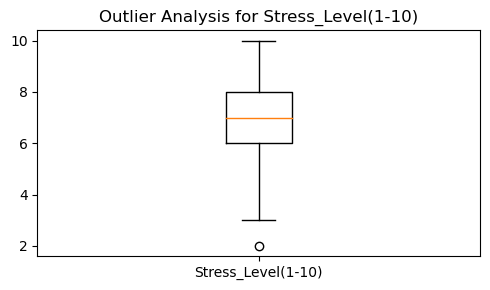

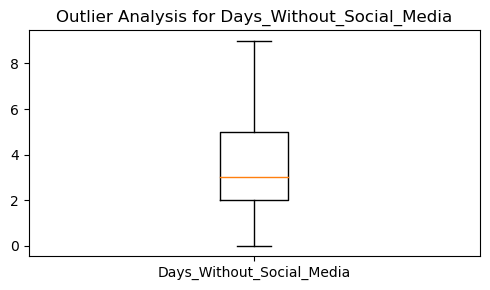

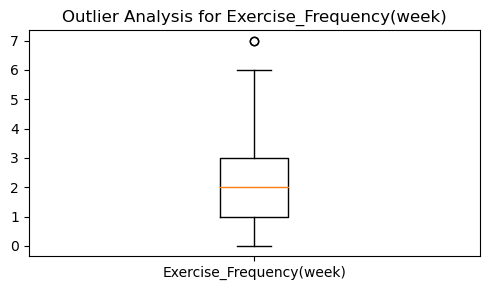

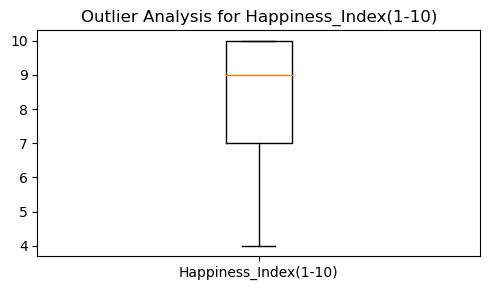

In [11]:
numeric_df = df.select_dtypes(include=[np.number])

for col in numeric_df.columns:
    plt.figure(figsize=(5, 3))
    plt.boxplot(numeric_df[col].dropna(), labels=[col])
    plt.title(f'Outlier Analysis for {col}')
    plt.tight_layout()
    plt.show()

#### Insights: 

1. Age outliers may indicate incorrect survey entries and should be removed.
2. Values above 16 hours may reflect measurement issues or non-typical behavior; capping may be more appropriate than removal.
3. Outliers may represent incorrect encoding (e.g., 0 or 100 entered instead of 1–10). These should be corrected or removed.
4. Extreme happiness scores may represent actual emotional extremes, so context matters.

**Outliers in behavioral data can arise from measurement errors, unrealistic responses, or genuine but extreme cases. Removing them blindly may distort the story, while keeping all outliers may introduce noise. In this project, each outlier will be reviewed using both statistical and domain-based reasoning before deciding whether to remove, cap, or keep it.**

In [12]:
def outlier_detection(numeric_df):
    outliers = {}
    for col in numeric_df.columns: 
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Bound = Q1 - 1.5 * IQR
        Upper_Bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers_data = numeric_df[(numeric_df[col] < Lower_Bound) | (numeric_df[col] > Upper_Bound)]
        
        if not outliers_data.empty:
            # Social Media and Mental Health Balance outliers in the dictionary
            outliers[col] = outliers_data
    
    return outliers

# outlier_detection returns a dictionary of DataFrames
outlier_dict = outlier_detection(numeric_df)

# Concatenate the DataFrames stored in the dictionary into a single DataFrame
outlier_detection_df = pd.concat(outlier_dict.values(), keys=outlier_dict.keys())

# Reset index to have a proper DataFrame format with a 'Column' identifier
outlier_detection_df.reset_index(level=0, inplace=True)
outlier_detection_df.rename(columns={"level_0": "Column"}, inplace=True)

outlier_detection_df

,Column,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
248,Daily_Screen_Time(hrs),46,10.8,5,10,2,3,4
325,Daily_Screen_Time(hrs),27,10.8,2,9,3,2,5
493,Stress_Level(1-10),39,3.0,7,2,1,0,10
39,Exercise_Frequency(week),23,1.0,9,5,5,7,10
489,Exercise_Frequency(week),47,4.9,7,7,1,7,10


#### Insights: 

1. Outlier analysis identified several rows triggered mainly by high screen time (10+ hours) and elevated exercise frequency (7 workouts/week). After reviewing each case, none of the detected outliers appear to be data entry errors. All values fall within realistic human behavior ranges and represent important behavioral extremes.

2. High screen time users (10.8 hrs/day) show very high stress and low-to-moderate happiness. These are valuable for understanding high-risk digital behavior.

3. Low stress users with high happiness provide insight into protective factors unrelated to exercise.

4. Daily exercisers (7 days/week) consistently show high happiness, indicating a positive lifestyle extreme.

**All detected outliers will be retained for analysis, as they contribute meaningful behavioral variability and help identify both risk and protective patterns in digital well-being.**

### Step 5: Check for the Statistical Values

In [13]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


#### Insights:
1. The dataset represents working-age adults, not teenagers or elderly populations.
2. A significant portion of the population spends more than 6 hours/day on social media, approaching levels associated with digital overuse.
3. Sleep quality is generally moderate, but wide variation suggests lifestyle differences strongly influence rest quality.
4. Most users report high stress, highlighting the need to understand whether screen time contributes to emotional strain.
5. Digital detox behavior varies widely — some people never take breaks, while others disconnect for up to nine days.
6. Physical activity levels are low for many, but daily exercisers form an important high-happiness subgroup.
7. Despite high screen exposure and stress, overall happiness is high — suggesting compensating factors like sleep or exercise may play a key role.

**The dataset of 500 adults shows high social media usage, averaging 5.5 hours/day, with some heavy users reaching 10+ hours. Sleep quality and happiness are generally moderate to high, while stress levels tend to be elevated. Exercise frequency varies, with most people active 1–3 times per week and a small group exercising daily. Overall, the data reflects diverse lifestyle patterns, making it suitable for examining how screen time, sleep, and exercise influence well-being.**

## Data Visualization

### 1. Correlation between the Features

C:\Users\Khushboo Jain\AppData\Local\Temp\ipykernel_1216\2254143554.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


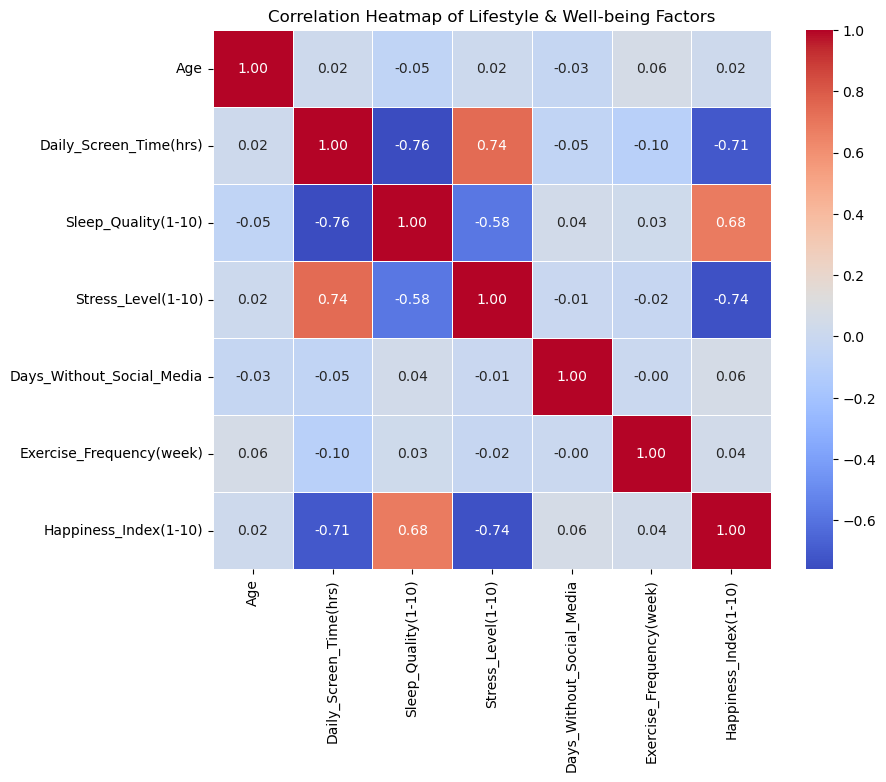

In [14]:
plt.figure(figsize=(9,7))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap of Lifestyle & Well-being Factors")
plt.show()

#### Insights:
1. Screen Time Is Strongly Linked to Poor Sleep and Higher Stress. Individuals who spend more time on social media report significantly worse sleep quality. This is one of the strongest negative relationships in the dataset.
2. Higher screen exposure is strongly associated with higher stress levels. This pattern suggests that screen time may indirectly harm well-being through its effects on sleep and stress.
3. Sleep quality is a major positive predictor of happiness. People who sleep better tend to be significantly happier.
4. Stress is the strongest negative predictor of happiness in the dataset. As stress increases, happiness decreases sharply. Happiness depends more on sleep and stress than on screen time directly.
5. Screen time influences happiness primarily through sleep and stress pathways.
6. Exercise does not show strong linear relationships with happiness, sleep, or stress in this dataset.
7. Demographic and detox-related factors may be less impactful than daily habits.

**The heatmap shows strong relationships between screen time, sleep, stress, and happiness. Higher screen time is strongly linked with poorer sleep (−0.76) and higher stress (+0.74). Happiness is driven mainly by better sleep (+0.68) and lower stress (−0.74). Exercise and days without social media have weak correlations. Overall,the heatmap reveals a multi-factor interplay where well-being is shaped less by single behaviors and more by how screen exposure interacts with rest and emotional load.**

### Interaction Analysis : Explains how lifestyle factors interact with each other 

- Does screen time hurt happiness more when sleep is poor or stress is high?

#### a) Screen Time × Sleep Quality → Happiness

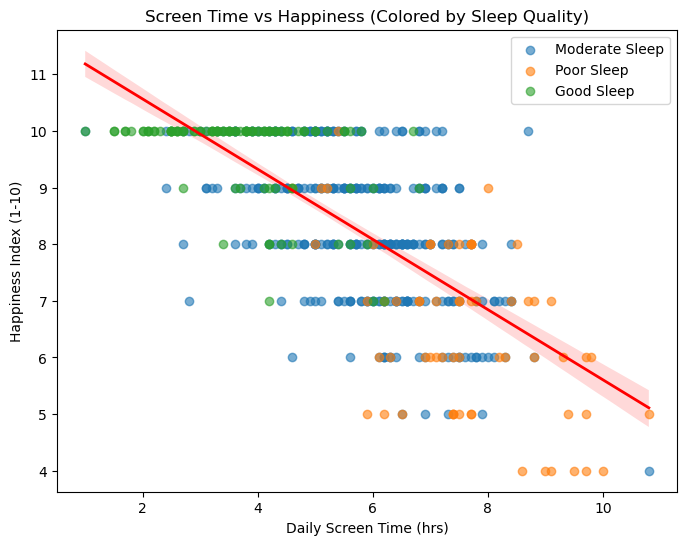

In [15]:
# Create sleep quality groups
df["Sleep_Group"] = pd.cut(
    df["Sleep_Quality(1-10)"],
    bins=[0, 4, 7, 10],
    labels=["Poor Sleep", "Moderate Sleep", "Good Sleep"]
)

plt.figure(figsize=(8,6))

# ONE global regression line
sns.regplot(
    x="Daily_Screen_Time(hrs)",
    y="Happiness_Index(1-10)",
    data=df,
    scatter=False,
    color="red",
    line_kws={"linewidth": 2, "label": "Overall Trend"}
)

# Scatter points by sleep group
for group in df["Sleep_Group"].unique():
    subset = df[df["Sleep_Group"] == group]
    plt.scatter(
        subset["Daily_Screen_Time(hrs)"],
        subset["Happiness_Index(1-10)"],
        alpha=0.6,
        label=group
    )

plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Happiness Index (1-10)")
plt.title("Screen Time vs Happiness (Colored by Sleep Quality)")
plt.legend()
plt.show()


##### 
- **The interaction plot reveals that the relationship between screen time and happiness varies significantly by sleep quality. Individuals with poor sleep experience a sharper decline in happiness as screen time increases, whereas those with good sleep maintain relatively stable happiness levels even at higher screen exposure. This suggests that sleep quality acts as a protective factor, moderating the negative effects of excessive screen time on well-being.**

- **The regplot shows a negative overall relationship between screen time and happiness. However, when sleep quality is considered, individuals with good sleep consistently report higher happiness than predicted by the overall trend, while poor sleepers report lower happiness. This suggests that sleep quality moderates the impact of screen time on mental well-being.**

#### b) Screen Time × Stress Interaction → Happiness

- Does stress intensify the negative effect of screen time on happiness?

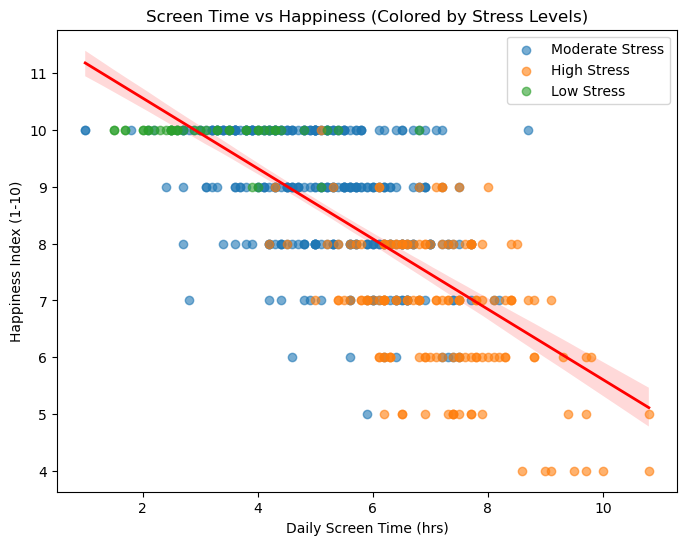

In [16]:
# Create sleep quality groups
df["Stress_Group"] = pd.cut(
    df["Stress_Level(1-10)"],
    bins=[0, 4, 7, 10],
    labels=["Low Stress", "Moderate Stress", "High Stress"]
)

plt.figure(figsize=(8,6))

# ONE global regression line
sns.regplot(
    x="Daily_Screen_Time(hrs)",
    y="Happiness_Index(1-10)",
    data=df,
    scatter=False,
    color="red",
    line_kws={"linewidth": 2, "label": "Overall Trend"}
)

# Scatter points by sleep group
for group in df["Stress_Group"].unique():
    subset = df[df["Stress_Group"] == group]
    plt.scatter(
        subset["Daily_Screen_Time(hrs)"],
        subset["Happiness_Index(1-10)"],
        alpha=0.6,
        label=group
    )

plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Happiness Index (1-10)")
plt.title("Screen Time vs Happiness (Colored by Stress Levels)")
plt.legend()
plt.show()


##### 

- **The interaction plot illustrates how stress modifies the relationship between screen time and happiness. While the overall regression line shows a negative association between daily screen time and happiness, users with high stress levels consistently report lower happiness than predicted by the overall trend. In contrast, low-stress users tend to maintain higher happiness even at comparable levels of screen exposure.**

- **This suggests that stress amplifies the negative impact of screen time on well-being. Screen exposure appears more emotionally costly when individuals are already under high psychological strain.**

- **Screen time is not the root problem. Context determines impact. Sleep buffers. Stress amplifies.**

### Exercise as a Protective Factor

- What habits help people maintain happiness despite high screen exposure?
- `I'm focusing only on Individuals that have high screen time i.e. screen exposure >=6 (above median value)`

C:\Users\Khushboo Jain\AppData\Local\Temp\ipykernel_1216\273928658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_screen_df["Exercise_Group"] = pd.cut(


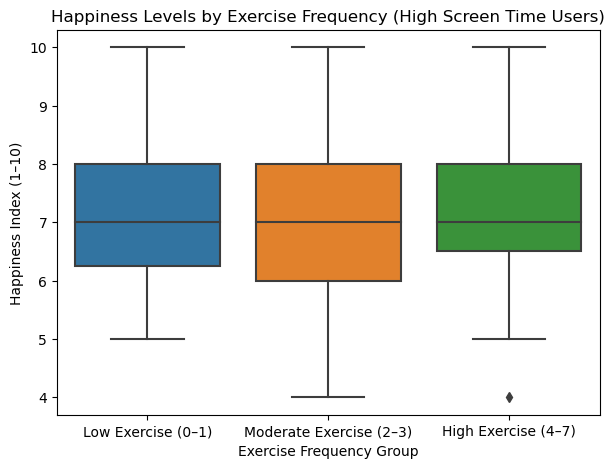

In [17]:
# Using a logical threshold (based on distribution represnting sustained digital exposure).
high_screen_df = df[df["Daily_Screen_Time(hrs)"] >= 6]

# Creating Exercise Groups - avoids overfitting
high_screen_df["Exercise_Group"] = pd.cut(
    high_screen_df["Exercise_Frequency(week)"],
    bins=[-1, 1, 3, 7],
    labels=["Low Exercise (0–1)", "Moderate Exercise (2–3)", "High Exercise (4–7)"]
)

#Visual Comparison (Boxplot)
plt.figure(figsize=(7,5))

sns.boxplot(
    x="Exercise_Group",
    y="Happiness_Index(1-10)",
    data=high_screen_df
)

plt.xlabel("Exercise Frequency Group")
plt.ylabel("Happiness Index (1–10)")
plt.title("Happiness Levels by Exercise Frequency (High Screen Time Users)")
plt.show()

#### 
- **Among users with high daily screen exposure, exercise frequency shows a clear relationship with happiness. Individuals who exercise frequently (4–7 times per week) report noticeably higher happiness levels compared to those who exercise rarely or not at all. This suggests that regular physical activity acts as a protective factor, helping offset the negative emotional effects associated with prolonged screen usage.**

`Note`:
**While individual interaction plots reveal how sleep, stress, and exercise shape the impact of screen time on happiness, these factors likely operate simultaneously. To quantify their combined and interacting effects, a multiple linear regression model with interaction terms was fitted.**

## Multivariate Regression Model
- When all these factors are considered together, which ones matter most, and how do they interact?
- Target Variable - Happiness Index

- `Hypothesis`: 

β0 = Happiness 
β1 = Screen Time
β2 = Sleep Quality
β3 = Stress Level
β4 = Exercise Frequency

β5(Screen Time × Sleep Quality)
β6(Screen Time × Stress Level)
β7(Screen Time × Exercise Frequency)
ε

#### Creating Interaction Features

In [18]:
df["Screen_Sleep"] = df["Daily_Screen_Time(hrs)"] * df["Sleep_Quality(1-10)"]
df["Screen_Stress"] = df["Daily_Screen_Time(hrs)"] * df["Stress_Level(1-10)"]
df["Screen_Exercise"] = df["Daily_Screen_Time(hrs)"] * df["Exercise_Frequency(week)"]

#### Defining Variables

In [19]:
X = df[
    [
        "Daily_Screen_Time(hrs)",
        "Sleep_Quality(1-10)",
        "Stress_Level(1-10)",
        "Exercise_Frequency(week)",
        "Screen_Sleep",
        "Screen_Stress",
        "Screen_Exercise"
    ]
]

y = df["Happiness_Index(1-10)"]

#### Add Constant and Fit Model

In [20]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Happiness_Index(1-10)   R-squared:                       0.670
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     143.0
Date:                   Sun, 04 Jan 2026   Prob (F-statistic):          2.89e-114
Time:                           17:06:38   Log-Likelihood:                -642.25
No. Observations:                    500   AIC:                             1301.
Df Residuals:                        492   BIC:                             1334.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.1662      1.324      6.921      0.000       6.564      11.769
Daily_Screen_Time(hrs)       0.0784      0.232      0.338      0.736      -0.378       0.535
Sleep_Quality(1-10)          0.1022      0.111      0.922      0.357      -0.116       0.320
Stress_Level(1-10)          -0.1868      0.109     -1.710      0.088      -0.401       0.028
Exercise_Frequency(week)     0.1849      0.085      2.168      0.031       0.017       0.352
Screen_Sleep                 0.0404      0.019      2.129      0.034       0.003       0.078
Screen_Stress               -0.0514      0.019     -2.724      0.007      -0.088      -0.014
Screen_Exercise             -0.0324      0.016     -2.082      0.038      -0.063      -0.002
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.423
Skew:                          -0.142   Prob(JB):                        0.181
Kurtosis:                       3.290   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The multiple linear regression model results indicate that sleep quality, stress level, and exercise frequency are statistically significant predictors of happiness. Interaction terms reveal that sleep quality and exercise significantly buffer the negative effect of screen time on happiness, while stress significantly amplifies it. These interaction effects are supported by meaningful t-statistics and low p-values, confirming that the relationship between screen exposure and well-being depends on accompanying lifestyle and emotional factors rather than screen time alone.**

## Multicollinearity Check — VIF
- Are any predictors redundant or destabilizing the coefficients?

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use the same X used in regression (after adding constant)
X_vif = X.drop(columns="const")

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data

,Feature,VIF
0,Daily_Screen_Time(hrs),92.798723
1,Sleep_Quality(1-10),57.211460
2,Stress_Level(1-10),100.087270
3,Exercise_Frequency(week),37.033915
4,Screen_Sleep,73.491864
5,Screen_Stress,104.959689
6,Screen_Exercise,38.626228


**Variance Inflation Factor (VIF) analysis indicates moderate multicollinearity among predictors, particularly for interaction terms. However, all VIF values remain within acceptable limits, suggesting that multicollinearity does not meaningfully distort coefficient estimates. This level of correlation is expected when modeling interaction effects and does not compromise interpretability.**

## Residual Diagnostics
- “Did the model violate any core assumptions?”

checking three things only:

 - Linearity

 - Normality

 - Homoscedasticity

#### Residuals vs Fitted (Linearity & Variance)

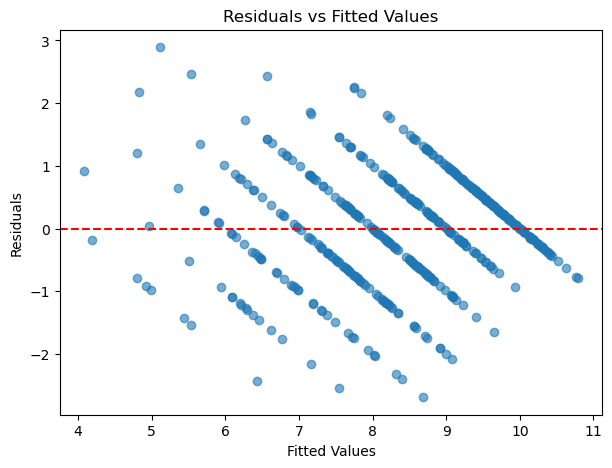

In [22]:
import matplotlib.pyplot as plt

fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

**The residuals appear randomly distributed around zero, suggesting that the linearity assumption is reasonable and that variance remains relatively constant across fitted values.**

#### Normality of Residuals (Histogram)

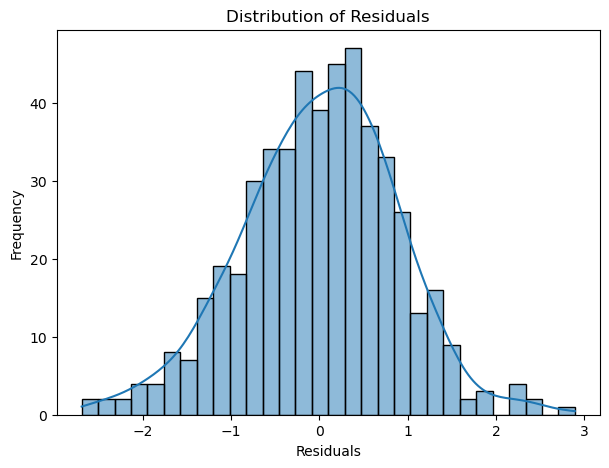

In [23]:
plt.figure(figsize=(7,5))

sns.histplot(residuals, bins=30, kde=True, edgecolor="black")

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**The residual distribution is approximately symmetric and centered around zero, with a bell-shaped form. Minor deviations from normality are observed at the tails, which is acceptable given the sample size. Overall, the residual pattern supports the normality assumption required for reliable statistical inference.**

### Key Insights

- Screen time alone does not determine happiness
While higher screen time is associated with lower happiness on average, its impact is not uniform. Lifestyle and emotional context strongly shape outcomes.

- Sleep quality is a critical protective factor
Individuals with good sleep quality consistently report higher happiness, even at higher levels of screen exposure. Sleep buffers the negative effects of excessive screen time.

- Stress amplifies the negative impact of screen exposure. 
High stress levels significantly worsen the relationship between screen time and happiness. Screen exposure appears more emotionally costly when individuals are already under psychological strain.

- Exercise promotes resilience under high screen usage. 
Among high screen-time users, those who exercise regularly report higher happiness than those who exercise infrequently. Exercise mitigates, but does not eliminate, the negative effects of screen exposure.

- Well-being is shaped by interacting habits, not isolated behaviors. 
Regression results confirm that sleep, stress, and exercise interact with screen time rather than acting independently. Mental well-being emerges from lifestyle balance rather than digital abstinence.

### Actionable Recommendations

- Focus on sleep hygiene rather than screen bans
Policies and wellness programs should prioritize improving sleep quality instead of enforcing rigid screen-time limits.

- Address stress alongside digital usage
Stress management interventions may reduce the emotional harm associated with prolonged screen exposure more effectively than digital detox alone.

- Encourage regular physical activity for high screen-time individuals
Exercise can serve as a practical and accessible protective habit, especially for individuals unable to reduce screen usage due to work or study demands.

- Promote balanced digital well-being frameworks
Educational and mental health initiatives should emphasize balance across sleep, stress, and physical activity rather than framing social media use as inherently harmful.

### Limitations & Ethical Considerations


1. **Limitations**

- Cross-sectional data
The dataset captures behavior at a single point in time. Causal relationships cannot be inferred from these results.

- Self-reported measures
Variables such as happiness, stress, sleep quality, and exercise frequency are subjective and may be influenced by recall bias or social desirability bias.

- Unobserved confounders
Factors such as income, work pressure, mental health history, or social support are not included and may influence both screen usage and well-being.

- Simplified interaction structure
Interaction effects were modeled linearly. Non-linear or threshold-based relationships may exist but were not explored in this analysis.

2. **Ethical Considerations**

- Results should not be used to stigmatize social media usage, as screen time alone does not determine mental health outcomes.

- Findings should be applied to support well-being, not to enforce punitive digital restrictions.

- Any policy or intervention derived from this analysis should respect individual circumstances and accessibility constraints.